# ニューラルネットワークの学習

# データから学習する

- ニューラルネットワークの特徴：
    - データから学習できる
    - 重みパラメータの値をデータから自動で決定可能
        - 手動でやっていたら大変...

## データ駆動
### 機械学習×特徴量
- 機械学習の中心は「データ」
- 機械学習による手法：
    - 人の介入を極力さけ、集められたデータからパターンを見つけようとする
- データを有効に活用するために...
    - データ（画像など）から**特徴量**を抽出して、その特徴量のパターンを機械学習の技術で学習
    - 特徴量：
        - 入力データ（画像）から本質的なデータ（重要データ）を的確に抽出できるように設計された変換器
        - 画像の特徴量は、ベクトルで記述される
        - `SIFT`, `SURF`, `HOG`などの有名な特徴量がある
- but...
    - 特徴量と機械学習によるアプローチでも問題に応じて「人」の手によって適した特徴量を考える必要がある。
### ニューラルネットワーク
- ニューラルネットワークは、画像を”そのまま”学習する
- 特徴量×機械学習によるアプローチに比べて、ニューラルネットワークは画像に含まれる重要な特徴量までも「機械」が学習
- 解く問題に依存せず、どんなものでも同じ流れで解くことができる！！

## 訓練データとテストデータ
- 訓練データ（教師データ）
    - 学習に使用
    - 最適なパラメータを探索
- テストデータ
    - 訓練したモデルの実力を評価
- なぜこの２つのデータを使用するのか？
    - **汎化能力**を正しく評価するため
    - 未知データに対しての能力であり、機械学習の最終目標
- あるデータセットだけに過度に適応した状態を **過学習(overfitting)** という

# 損失関数

- ニューラルネットワークの学習では、ある「一つの指標」によって現状の状態を表す
    - この指標を基準として、最適な重みパラメータを探索する
- ニューラルネットワークの学習における指標は**損失関数**と呼ばれる
    - 性能の`悪さ`を示す指標（教師データにどれだけ適合していないか）
    - **二乗和誤差**や**交差エントロピー誤差**などが用いられる

## 二乗和誤差
- 最も有名な損失関数
$$E=\frac{1}{2}\sum_{k}^{}(y_k-t_k)^2$$
- y_k：ニューラルネットワークの出力
- t_k：教師データ
    - 正解ラベルを１として、それ以外を0と表す表記法：**one-hot表現**
- k：データの次元数

In [14]:
import numpy as np
# MNIST datasetの場合。。。
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]  # ニューラルネットワークの出力（softmax関数の出力）
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  # 教師データ（one-hot表現）

def mean_squared_error(y, t):
    """
    二乗誤差を計算する関数
    y: ニューラルネットワークの出力
    t: 教師データ
    """
    return 0.5 * np.sum((y - t) ** 2)

print(f"出力と教師データが一致しているとき： {mean_squared_error(np.array(y), np.array(t)):15}")

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]  # 「7」が最も高い確率で出力された場合
print(f"出力と教師データが不一致なとき：{mean_squared_error(np.array(y), np.array(t)):10}")

出力と教師データが一致しているとき： 0.09750000000000003
出力と教師データが不一致なとき：    0.5975


- 正解している時は、損失関数の値は小さくなり、不正解の場合は損失関数の値は大きくなる
- 1つ目の方が適していることが判断できる！！

## 交差エントロピー誤差
- 二乗和誤差と別の損失関数として、**交差エントロピー誤差**も用いられる
$$E=-\sum_{k}^{}t_k\log y_k$$
- y_k：ニューラルネットワークの出力
- t_k：正解ラベル（one-hot表現）

In [1]:
import numpy as np
def cross_entropy_error(y, t):
    """
    交差エントロピー誤差を計算する関数
    y: ニューラルネットワークの出力
    t: 教師データ
    """
    delta = 1e-7  # log(0)を避けるための微小値
    return -np.sum(t * np.log(y + delta))  # yが0になるとlog(y)が無限大(-inf)になるので、微小値を足す

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  # 教師データ（one-hot表現）
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]  # ニューラルネットワークの出力（softmax関数の出力）
print(f"出力と教師データが一致しているとき： {cross_entropy_error(np.array(y), np.array(t)):15}")
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]  # 「7」が最も高い確率で出力された場合
print(f"出力と教師データが不一致なとき：{cross_entropy_error(np.array(y), np.array(t)):10}")


出力と教師データが一致しているとき： 0.510825457099338
出力と教師データが不一致なとき：2.302584092994546


- 正解している時は、損失関数の値は小さくなり、不正解の場合は損失関数の値は大きくなる
- 1つ目の方が適していることが判断できる！！

## ミニバッチ学習
- 訓練データを使って学習するとは...?
    - 訓練データに対する損失関数を求め、その値をできるだけ小さくするようなパラメータを探し出すこと  
    --> 損失関数はすべての訓練データを対象に求める必要がある!  
    - 訓練データが100個あれば、その**100個の損失関数の和を指標**とする  
    --> つまり、計算が少し変わってくる 

- 訓練データ分の計算  
    - 交差エントロピー誤差の場合は、以下のようになる  
    $$E=-\frac{1}{N}\sum_{n}^{}\sum_{k}^{}t_{nk}\log y_{nk}$$
    - N：訓練データ数
    - t_nk：n個目のデータのk次元目の値（教師データ）
    - y_nk：ニューラルネットワークの出力
    - この式では、**1個あたりの「平均の損失関数」** を求めるている
        - 平均化を行うことで、訓練データの数に関係なく、いつでも統一した指標が得られる。

- 膨大な数の訓練データがあるときは...?
    - MNISTのデータセットのように訓練データが60,000個などですべての損失関数の和をもめるのは時間がかかる  
    --> ビッグデータであれば、すべてを対象とした損失関数をもめるのは現実的でない
    - データの一部を選び出し、その一部のデータを全体の「近似として使用する」
        - 訓練データからある枚数選びだし、（**ミニバッチ**（小さな塊）という）それごとに学習する
        - Ex)  
        60,000枚の中から100枚を無作為に選び出して、その100枚で学習を行う
        - この学習方法を**ミニバッチ学習**という

- ランダムに取り出すコード
    - `np.random.choice(ランダムの範囲, 取り出したい数)`を使用することで、指定された数字の中からランダムに好きな数取り出すことが可能
    - これにより取り出されたミニバッチを使用して、損失関数を計算する


In [3]:
import sys, os
import numpy as np
sys.path.append(os.pardir)  # 親ディレクトリをパスに追加
from deep_learning_from_scratch.dataset.mnist import load_mnist

(img_train, label_train), (img_test, label_test) = load_mnist(normalize=True, one_hot_label=True)
print(img_train.shape)  # (60000, 784)
print(label_train.shape)  # (60000, 10)

# ランダムに10枚の画像を選択する
train_size = img_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)  # 0~59,999の中から10個のインデックスをランダムに選ぶ
x_batch = img_train[batch_mask]  # 10枚の画像
t_batch = label_train[batch_mask]  # 10枚の教師データ
print(x_batch.shape)  # (10, 784)
print(t_batch.shape)  # (10, 10)

(60000, 784)
(60000, 10)
(10, 784)
(10, 10)


## [バッチ対応版]交差エントロピー誤差の実装
- 以前まで実装した交差エントロピー誤差は、１つのデータを対象とした誤差
- データが一つの場合と、データがミニバッチでまとめられて入力される場合の両方のケースに対応できる用に実装

In [16]:
def cross_entropy_error(y, t):
    """
    交差エントロピー誤差を計算する関数
    y: ニューラルネットワークの出力
    t: 教師データ
    one-hot表現でない場合にも対応
    """
    if y.ndim == 1:  # 1次元配列の場合
        # yとtを2次元配列に変換
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]  # バッチサイズ
    return -np.sum(t * np.log(y + 1e-7)) / batch_size  # バッチサイズで割る
    # return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size  # バッチサイズで割る

## なぜ損失関数を設定するのか？
- 損失関数＝性能の`悪さ`を示す指標（教師データにどれだけ適合していないか）
- ニューラルネットワークの学習の際に、認識精度を「指標」にしてはいけない
    - 認識精度を指標にすると、パラメータの微分がほとんどの場所で**0になる**
- なぜ0になるのか？
    - 100枚ある訓練データの中で32枚を正しく認識できているとする（精度は32%）
    - 重みパラメータを少しいじっただけでは、精度の32%はあまり変化しない
        - 変化したとしても、33%, 35%などと**不連続的**
    - 損失関数を指標とした場合、値は0.92543...のように表される。
        - パラメータの値をいじることで、それに反応して損失関数も0.92542...などと**連続的**に変化する
        - この**連続性**が微分した時に傾きが0にならないことを示している。

# 数値微分

## 微分
- 微分とは？
    - ある瞬間の変化量を表したもの
    $$\frac{df(x)}{d_x}=\lim_{h→0}\frac{f(x+h)-f(x)}{h}$$
    - xに対するf(x)の変化度合を示す。
    - xの「小さな変化」によって、関数f(x)の値がどれだけ変化するかということを意味する
    - そのとき、小さな変化である「h」を限りなく0に近づけるのがlimの役割

In [20]:
import numpy as np
# 悪い例
def numerical_diff(f, x):
    """
    数値微分を計算する関数
    f: 関数
    x: 関数fへの引数
    """
    h = 10e-50  # 微小値(0が50個続く)
    return (f(x + h) - f(x)) / h

print(np.float32(1e-50))  # 丸め誤差

0.0


- 上記の例では、**丸め誤差**が問題になる
    - 小数の地位さな範囲において数値が省略されること
    - これにより、最終的な結果に誤差が生じる
- そもそも上記の計算には誤差が生じる！
    - 真の微分：xの位置で関数の傾きを示す
    - 今回の微分：(x+h)とxの間の傾きに対応  
    --> ２つは厳密には一致しない
- 対策：**中心差分**
    - (x+h)と(x-h)での関数fの差分を計算することで誤差を減らす
    - xを中心として、その前後の差分を計算することから**中心差分**という

In [21]:
def numerical_diff(f, x):
    """
    数値微分を計算する関数
    f: 関数
    x: 関数fへの引数
    """
    h = 1e-4  # 微小値(0.0001)
    return (f(x + h) - f(x - h)) / (2 * h)  # 中心差分法

## 数値微分の例
- 簡単な関数の微分をしてみる
$$y=0.01x^2+0.1x$$

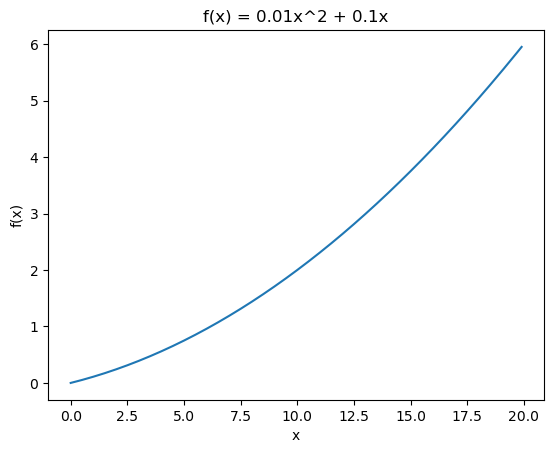

0.1999999999990898


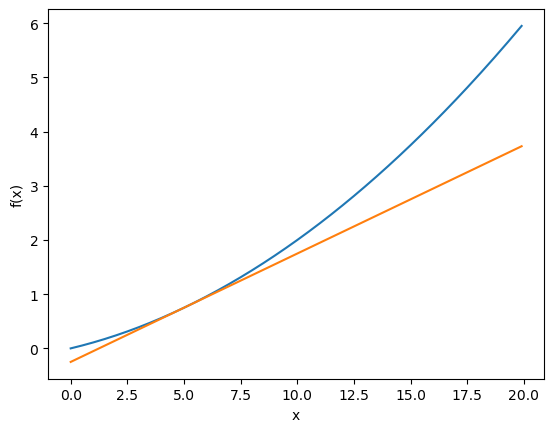

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def function_1(x):
    """
    関数f(x) = 0.01x^2 + 0.1xの定義
    x: 関数fへの引数
    """
    return 0.01 * x ** 2 + 0.1 * x

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)  # 0~20まで0.1刻みの配列
y = function_1(x)  # 関数fの値
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("f(x) = 0.01x^2 + 0.1x")
plt.plot(x, y)
plt.show()
     
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


## 偏微分
- ２乗和の計算
$$f(x_0, x_1) = x_0^2 + x_1^2$$

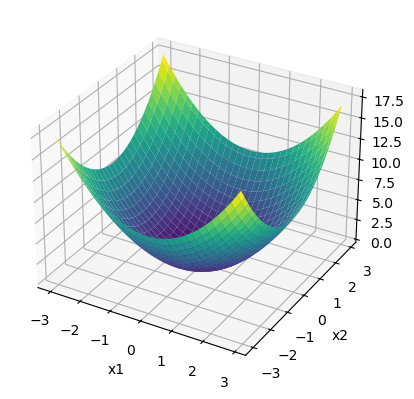

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def function_2(x):
    """
    関数f(x) = x^2の定義
    x: 関数fへの引数
    """
    return x[0] ** 2 + x[1] ** 2  # xの要素を全て二乗して足し合わせる

# f(x0, x1)=x0^2+x1^2を3次元グラフを描画する
x1 = np.arange(-3.0, 3.0, 0.1)  # -3~3まで0.1刻みの配列
x2 = np.arange(-3.0, 3.0, 0.1)  # -3~3まで0.1刻みの配列
X1, X2 = np.meshgrid(x1, x2)  # x1とx2のメッシュグリッドを作成
Y = function_2(np.array([X1, X2]))  # 関数fの値
fig = plt.figure()  # 図を作成
ax = fig.add_subplot(111, projection='3d')  # 3Dプロットを作成
ax.plot_surface(X1, X2, Y, cmap='viridis')  # サーフェスプロットを作成
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()  # プロットを表示        

- 変数が２つあるので、どの変数に対して微分するかを区別する必要がる。
- このように、複数の変数からなる関数の微分を**偏微分**という
$$f(x_0, x_1) = x_0^2 + x_1^2$$
$$\frac{∂f}{∂x_0}, \frac{∂f}{∂x_1}$$

In [49]:
# x0=3, x1=4の時のx0の偏微分
def function_tmpl(x0):
    return x0 ** 2 + 4 ** 2
print(numerical_diff(function_tmpl, 3))  # x0=3, x1=4の時のx0の偏微分
# x0=3, x1=4の時のx1の偏微分
def function_tmpl(x1):
    return 3 ** 2 + x1 ** 2
print(numerical_diff(function_tmpl, 4))  # x0=3, x1=4の時のx1の偏微分

6.00000000000378
7.999999999999119


# 勾配

- x0とx1の偏微分をまとめて計算したい
- Ex)  
$$x_0 = 3, x_1 = 4のきの(x_0, x_1)の両方の偏微分をまとめて(\frac{∂f}{∂x_0}, \frac{∂f}{∂x_1})として計算する$$
- このように、変数の偏微分をベクトルとしてまとめたもの**勾配（gradient）** という。

In [50]:
def numerical_gradient(f, x):
    """
    勾配を計算する関数
    f: 関数
    x: 関数fへの引数
    """
    h = 1e-4  # 微小値(0.0001)
    grad = np.zeros_like(x)  # xと同じ形の配列を作成

    for idx in range(x.size):  # xの要素数分ループ
        tmp_val = x[idx]
        # f(x+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)  # 中心差分法
        x[idx] = tmp_val  # 元の値に戻す
    return grad  # 勾配を返す

print(numerical_gradient(function_2, np.array([3.0, 4.0])))  # x0=3, x1=4の時の勾配
print(numerical_gradient(function_2, np.array([0.0, 2.0])))  # x0=0, x1=2の時の勾配
print(numerical_gradient(function_2, np.array([3.0, 0.0])))  # x0=3, x1=0の時の勾配

[6. 8.]
[0. 4.]
[6. 0.]


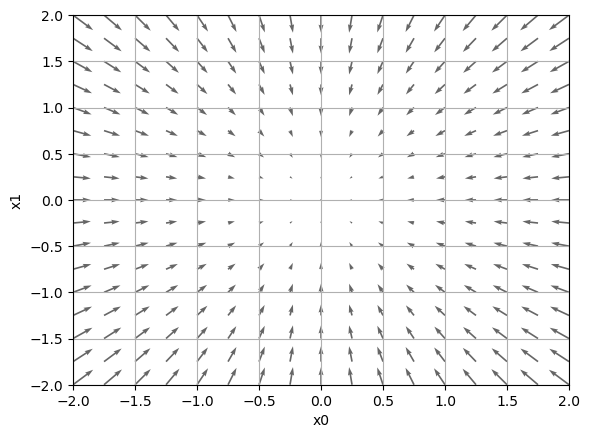

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()


- 上の図より、  f(x_0, x_1)の勾配は、最も低い場所（最小値）を示している用に見える
- 一番低い場所から遠く離れれば離れるほど、矢印の大きさも大きくなることがわかる
### Point　勾配が指し示す方向は、各関数の**値を最も減らす方向**

## 勾配法
- ニューラルネットワークは最適な重みとバイアスを学習時に見つける必要がある。
- 最適なパラメータ＝損失関数が最小値をとるときのパラメータの値
    - 損失関数は複雑
    - パラメータは広大でどこに最小値をとる場所があるのか不明  
    --> 勾配をうまく利用することで関数の最小値（できるだけ小さい値）を探層とする取り組みを**勾配法**という
- 注意：
    - 勾配：各地点における関数の値を最も減らす方向に示すもの
        - 勾配がさす先が本当に関数の**最小値**なのかどうかは微妙（最小値でない場合がほとんど）
- 必ずしも最小値を示すわけではないにしろ、その方向に進めることで値を減らすことは可能
    - 繰り返し勾配方向へ移動することで、関数の値を徐々に減らすのが**勾配法（gradient mothod）**
        - **勾配降下法（gradient decent method）**：最小値を探す
        - **勾配上昇法（gradient ascent method）**：最大値を探す
- 勾配法の数式
    $$x_0 = x_0 - ŋ\frac{∂f}{∂x_0}$$
    $$x_1 = x_1 - ŋ\frac{∂f}{∂x_1}$$
    - `ŋ`：**学習率**
        - **どれだけ学習するべきか、どれだけパラメータを更新するかを決める**
        - このようなパラメータを**ハイパーパラメータ**と呼ぶ
            - 自動ではなく人の手で変更して、最適な値を探す必要があるパラメータ
    - 数式では、1回の更新式を示しており、ステップを繰り返し行う
        - ステップごとに変数を更新し、徐々に関数の値を減らす
        - 変数が複数個になってもそれぞれの変数の偏微分の値によって更新される
- 学習率の初期化
    - 学習率の値は、0.001や0.01など前もって何らかの値に決める必要がある
    - 大きすぎても小さすぎても×
    - 学習率の値を変更しながら正しく学習できているかどうか確認作業を行うのが一般的

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    """
    勾配降下法
    f: 最適化したい関数
    init_x: 初期値
    lr: 学習率（learning rate）
    step_num: 勾配法による繰り返しの数
    """
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)  # 勾配を計算
        x -= lr * grad  # 勾配降下法

    return x  # 最適化された値を返す

def function_2(x):
    return x[0] ** 2 + x[1] ** 2  # xの要素を全て二乗して足し合わせる

init_x = np.array([-3.0, 4.0])  # 初期値
x = gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)  # 最適化された値
print(f"学習率0.1の時：{x}(ほぼほぼ[0, 0])")  # 最適化された値
# print(x_list)  # 最適化の過程

# 学習率を変えてみる
init_x = np.array([-3.0, 4.0])  # 初期値
x = gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)  # 最適化された値
print(f"学習率10.0の時：{x}(おおきな値に発散)")  # 最適化された値
init_x = np.array([-3.0, 4.0])  # 初期値
x = gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)  # 最適化された値
print(f"学習率1e-10の時：{x}（ほとんど変化しない）")  # 最適化された値

学習率0.1の時：[-6.11110793e-10  8.14814391e-10](ほぼほぼ[0, 0])
学習率10.0の時：[-2.58983747e+13 -1.29524862e+12](おおきな値に発散)
学習率1e-10の時：[-2.99999994  3.99999992]（ほとんど変化しない）


## ニューラルネットワークに対する勾配
- ニューラルネットワークの学習においても勾配を求める必要あり
    - ここでの勾配は、重みパラメータに関する損失関数の勾配
    - Ex)
        - 2×3の重み`W`だけ持つニューラルネットワーク
        - 損失関数`L`
        $$W = ([w_{11}, w_{21}, w_{31}],[w_{12}, w_{22}, w_{32}])$$
        $$\frac{∂L}{∂W}=([\frac{∂L}{∂w_{11}}, \frac{∂L}{∂w_{21}}, \frac{∂L}{∂w_{31}}],[\frac{∂L}{∂w_{12}}, \frac{∂L}{∂w_{22}}, \frac{∂L}{∂w_{32}}])$$
        - 勾配の各要素は、それぞれの要素に対する偏微分から構成
        - 要素wを微小に変化させると損失関数Lがどれだけ変化するかを示す

In [48]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリをパスに追加
import numpy as np
from deep_learning_from_scratch.common.functions import softmax, cross_entropy_error  # softmax関数と交差エントロピー誤差を計算する関数
from deep_learning_from_scratch.common.gradient import numerical_gradient  # 勾配を計算する関数

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 重みをガウス分布に初期化

    def predict(self, x):
        """
        予測を行う関数
        x: 入力データ
        """
        return np.dot(x, self.W)  # xとWの内積を計算
    
    def loss(self, x, t):
        """
        損失関数を計算する関数
        x: 入力データ
        t: 教師データ
        """
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss
    
def f(W):
    """
    損失関数を計算する関数
    ちなみに、pythonでは`lambda`という気泡を使って簡単な関数を定義することができる
    Ex)
    f = lambda x: net.loss(x, t)
    """
    return net.loss(x, t)
    
net = simpleNet()  # ネットワークのインスタンスを作成
print(net.W)  # 重みを表示(2 x 3の行列)
x = np.array([0.6, 0.9])  # 入力データ
p = net.predict(x)  # 予測
print(p)  # 予測結果

print(f"最大値のindex：{np.argmax(p)}")  # 予測結果の最大値のインデックス

t = np.array([0, 0, 1])  # 教師データ（one-hot表現）
print(f"教師データ：{t}")  # 教師データ
print(f"loss：{net.loss(x, t):.4f}")  # 損失関数の値

dW = numerical_gradient(f, net.W)  # 勾配を計算
print("勾配：")
print(dW)  # 勾配を表示

[[-0.4524712   0.46516031  0.92359997]
 [-0.26177019 -0.00285105  0.16973067]]
[-0.50707589  0.27653024  0.70691758]
最大値のindex：2
教師データ：[0 0 1]
loss：0.6664
勾配：
[[ 0.09151562  0.20036001 -0.29187563]
 [ 0.13727343  0.30054001 -0.43781344]]


- 勾配の見方：
    - 各要素wをhだけ増やすと損失関数の値は`要素*h`だけ増加するということ
    - つまり要素が`+`であれば損失関数の値は**増加**し、`-`であれば損失関数の値は**減少**する
    - 損失関数を減らすという観点からいえば、勾配の要素が正の時はマイナス方向に更新し、負の時はプラス方向に更新するとよい。

# 学習アルゴリズムの実装

- 前提：
    - ニューラルネットワークは適応可能な重みとバイアスがあり、この重みとバイアスを訓練データに適応するように調整することを「**学習**」という
    - 手段は以下の通り
        - Step1.ミニバッチ  
        訓練データの中からランダムに一部のデータを選び出す。  
        その選ばれたデータをミニバッチといい、ここでは、そのミニバッチの損失損失関数の値を減らすことを目的とする
        - Step2.勾配の算出  
        ミニバッチの損失関数を減らすために、各重みパラメータ勾配を求める。  
        勾配は、損失関数の値を最も減らす方向を示す
        - Step3.パラメータの更新    
        重みパラメータを勾配方向に微小だけ更新する
        - Step4.繰り返す  
        Step1~3を繰り返す
    - 上記の方法を **確率的勾配降下法(SGD)** と呼ぶ
        - 無作為に選び出したデータに対して行う勾配降下法
        - 確率的：確率的に無作為に選び出した（ミニバッチのこと）
        

## 2層ニューラルネットワークのクラス

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリをパスに追加
from deep_learning_from_scratch.common.functions import *
from deep_learning_from_scratch.common.gradient import numerical_gradient  # 勾配を計算する関数
import numpy as np
import matplotlib.pyplot as plt

class TwoLayerNet:
    """
    2層のニューラルネットワーク
    """
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        """
        初期化を行うメソッド
        input_size: 入力層のニューロン数(if MNISTなら784)
        hidden_size: 隠れ層のニューロン数(適当な数値を指定)
        output_size: 出力層のニューロン数(if MNISTなら10)
        weight_init_std: 重みの初期化の標準偏差
        """
        # 重みを初期化
        self.params = {}  # ニューラルネットワークのパラメータを格納する辞書
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)  # 入力層から隠れ層への重み
        self.params['b1'] = np.zeros(hidden_size)  # 隠れ層のバイアス
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)  # 隠れ層から出力層への重み
        self.params['b2'] = np.zeros(output_size)  # 出力層のバイアス
    
    def predict(self, x):
        """
        認識（推論）を行うメソッド
        x: 入力データ（今回は画像）
        """
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y  # 予測結果を返す
    
    def loss(self, x, t):
        """
        損失関数を計算するメソッド
        x: 入力データ（今回は画像）
        t: 教師データ（one-hot表現）
        """
        y = self.predict(x)

        return cross_entropy_error(y, t)  # 交差エントロピー誤差を返す
    
    def accuracy(self, x, t):
        """
        認識精度を計算するメソッド
        x: 入力データ
        t: 教師データ
        """
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        """
        重みパラメータに対する勾配を数値微分によって計算するメソッド
        これは、学習に時間がかかるため、通常は使用しない
        x: 入力データ
        t: 教師データ
        """
        loss_W = lambda W: self.loss(x, t)
        grads = {}  # 勾配を格納する辞書
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])  # 1層目の重みの勾配
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])  # 1層目のバイアスの勾配
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])  # 2層目の重みの勾配
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])  # 2層目のバイアスの勾配
        return grads

- パラメータの設定
    - networkを初期化するときに、それぞれのパラメータの値を設定する

In [ ]:
# ネットワークのパラメータを設定
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)  # ネットワークのインスタンスを作成
print(f"重み1：{net.params['W1'].shape}")  # 重みの形状を表示(784 x 50)
print(f"バイアス1：{net.params['b1'].shape}")  # バイアスの形状を表示(50,)
print(f"重み2：{net.params['W2'].shape}")  # 重みの形状を表示(50 x 10)
print(f"バイアス2：{net.params['b2'].shape}")  # バイアスの形状を表示(10,)

重み1：(784, 100)
バイアス1：(100,)
重み2：(100, 10)
バイアス2：(10,)


In [10]:
# 推論処理
n = np.random.rand(100, 784)  # ランダムな入力データ(100 x 784)
y = net.predict(n)  # 推論処理
print(f"推論結果の形状：{y.shape}")  # 推論結果の形状を表示(100 x 10)

推論結果の形状：(100, 10)


- grads変数
    - 各パラメータの勾配が格納される
    - numerical_gradient()メソッドを使って勾配を計算すると、grads変数に勾配情報が格納される

In [16]:
x = np.random.rand(100, 784)  # ランダムな入力データ(100 x 784)
t = np.random.rand(100, 10)  # ランダムな出猪飼ラベル(100 x 10)

grads = net.numerical_gradient(x, t)  # 勾配を計算
print(f"重み1の勾配の形状：{grads['W1'].shape}")  # 勾配の形状を表示(784 x 100)
print(f"バイアス1の勾配の形状：{grads['b1'].shape}")  # 勾配の形状を表示(100,)
print(f"重み2の勾配の形状：{grads['W2'].shape}")  # 勾配の形状を表示(100 x 10)
print(f"バイアス2の勾配の形状：{grads['b2'].shape}")  # 勾配の形状を表示(10,)


重み1の勾配の形状：(784, 100)
バイアス1の勾配の形状：(100,)
重み2の勾配の形状：(100, 10)
バイアス2の勾配の形状：(10,)


## ミニバッチ学習の実装
- ニューラルネットワークの学習の実装
    - ミニバッチ学習を使用
        - 訓練データから無作為に1部のデータを取り出す
        - このミニバッチを対象に勾配法によりパラメータを更新

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from deep_learning_from_scratch.common.functions import *
from deep_learning_from_scratch.common.gradient import numerical_gradient
import numpy as np


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

イテレーション 0: 損失 = 2.2918
イテレーション 1000: 損失 = 0.6016
イテレーション 2000: 損失 = 0.3476
イテレーション 3000: 損失 = 0.1919
イテレーション 4000: 損失 = 0.2507
イテレーション 5000: 損失 = 0.4410
イテレーション 6000: 損失 = 0.1967
イテレーション 7000: 損失 = 0.1975
イテレーション 8000: 損失 = 0.2025
イテレーション 9000: 損失 = 0.1262


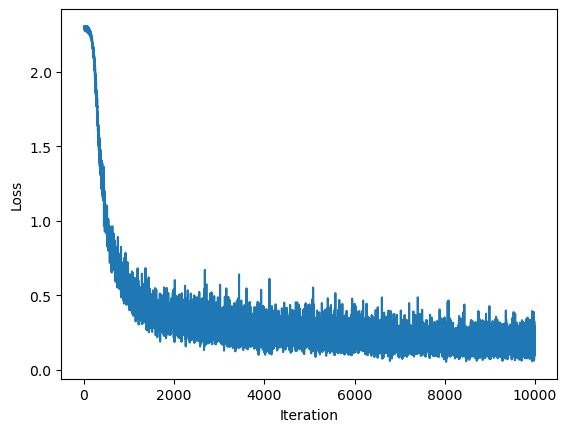

In [3]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリをパスに追加
import numpy as np
from deep_learning_from_scratch.common.functions import *
from deep_learning_from_scratch.dataset.mnist import load_mnist
import matplotlib.pyplot as plt

# MNISTデータセットの読み込み
(img_train, label_train), (img_test, label_test) = load_mnist(normalize=True, one_hot_label=True)  # 正規化とone-hot表現を適用

train_loss_list = []  # 学習時の損失を格納するリスト

# ハイパーパラメータの設定
iters_num = 10000  # 学習の繰り返し回数
train_size = img_train.shape[0]  # 学習データのサイズ(60000)
batch_size = 100  # バッチサイズ
learning_rate = 0.1  # 学習率

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)  # ネットワークのインスタンスを作成

for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)  # ランダムにバッチサイズ分のインデックスを取得(60000の中から100個のインデックスをランダムに選ぶ)
    x_batch = img_train[batch_mask]  # ミニバッチの画像データ
    t_batch = label_train[batch_mask]  # ミニバッチの正解データ

    # 勾配の計算
    # grad = network.numerical_gradient(x_batch, t_batch)  # 勾配を計算（遅い版）
    grad = network.gradient(x_batch, t_batch)  # 勾配を計算（高速版）

    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]  # 勾配降下法

    # 学習経過を記録
    loss = network.loss(x_batch, t_batch)  # 損失を計算
    train_loss_list.append(loss)  # 損失をリストに追加
    if i % 1000 == 0:  # 1000回ごとに損失を表示
        print(f"イテレーション {i}: 損失 = {loss:.4f}")

# 学習結果のプロット
x = np.arange(len(train_loss_list))  # x軸の値
plt.plot(x, train_loss_list, label='Training Loss')  # 学習損失のプロット
plt.xlabel('Iteration')  # x軸のラベル
plt.ylabel('Loss')  # y軸のラベル
plt.show()



- 学習回数が進むに連れて、訓練データのミニバッチに対する損失関数の値が徐々に減少している
    - 正答率が徐々にupしている
    - 最適な重みパラメータへ近づいていく！（データに適用している）

## テストデータで評価


- 訓練データに対する損失関数の値が減少＝学習がうまくいっている
    - 他のデータセットにも同じ程度の実力を発揮できるかはわからない（汎用性の有無の判断）

- 学習では、訓練データ以外にデータを正しく認識できるかを確認する必要がある
    - **過学習**が起きていないかの確認
        - 過度にデータセットに適応していないかの確認
- 定期的に、訓練データとテストデータを対象に認識制度を記録するとよい。
    - 定期的：１エポックごと
        - １エポック：  
        学習において訓練データをすべて使い切ったときの回数  
        Ex)  
        1000個のデータセットに対して100個のミニバッチで学習する場合、確率的勾配降下法を100回繰り返したら1エポックとなる

        

イテレーション 0: 損失 = 2.2902, 学習精度 = 0.1044, テスト精度 = 0.1028
イテレーション 600: 損失 = 0.9303, 学習精度 = 0.7807, テスト精度 = 0.7837
イテレーション 1200: 損失 = 0.5574, 学習精度 = 0.8791, テスト精度 = 0.8806
イテレーション 1800: 損失 = 0.2777, 学習精度 = 0.8995, テスト精度 = 0.9026
イテレーション 2400: 損失 = 0.2906, 学習精度 = 0.9074, テスト精度 = 0.9098
イテレーション 3000: 損失 = 0.1615, 学習精度 = 0.9134, テスト精度 = 0.9154
イテレーション 3600: 損失 = 0.2251, 学習精度 = 0.9190, テスト精度 = 0.9211
イテレーション 4200: 損失 = 0.1389, 学習精度 = 0.9228, テスト精度 = 0.9252
イテレーション 4800: 損失 = 0.4493, 学習精度 = 0.9258, テスト精度 = 0.9281
イテレーション 5400: 損失 = 0.1929, 学習精度 = 0.9305, テスト精度 = 0.9320
イテレーション 6000: 損失 = 0.2504, 学習精度 = 0.9322, テスト精度 = 0.9321
イテレーション 6600: 損失 = 0.2162, 学習精度 = 0.9351, テスト精度 = 0.9356
イテレーション 7200: 損失 = 0.2465, 学習精度 = 0.9368, テスト精度 = 0.9372
イテレーション 7800: 損失 = 0.1852, 学習精度 = 0.9389, テスト精度 = 0.9400
イテレーション 8400: 損失 = 0.1452, 学習精度 = 0.9415, テスト精度 = 0.9419
イテレーション 9000: 損失 = 0.1015, 学習精度 = 0.9441, テスト精度 = 0.9421
イテレーション 9600: 損失 = 0.1653, 学習精度 = 0.9448, テスト精度 = 0.9425


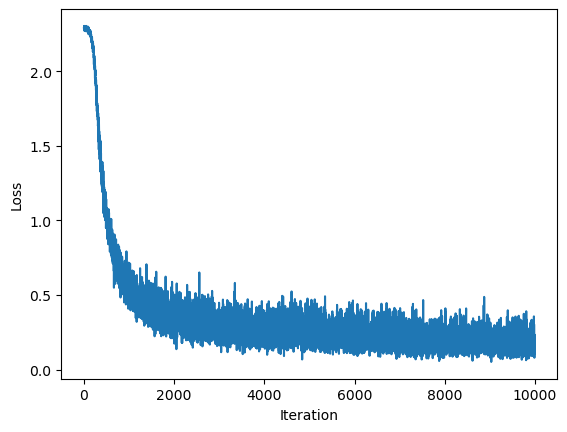

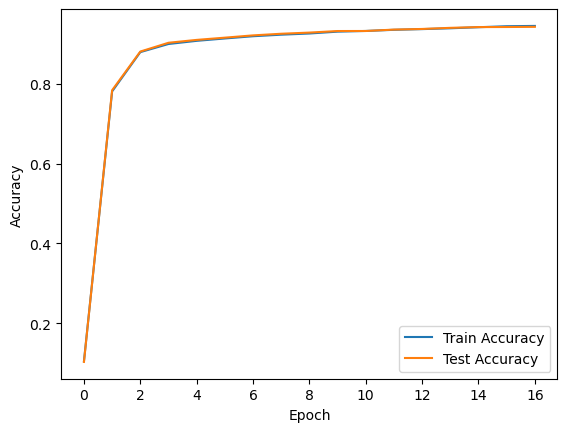

In [6]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリをパスに追加
import numpy as np
from deep_learning_from_scratch.common.functions import *
from deep_learning_from_scratch.dataset.mnist import load_mnist
import matplotlib.pyplot as plt

# MNISTデータセットの読み込み
(img_train, label_train), (img_test, label_test) = load_mnist(normalize=True, one_hot_label=True)  # 正規化とone-hot表現を適用

train_loss_list = []  # 学習時の損失を格納するリスト
# 追加
train_acc_list = []  # 学習時の精度を格納するリスト
test_acc_list = []  # テスト時の精度を格納するリスト
iter_per_epoch = max(train_size // batch_size, 1)  # 1エポックあたりの繰り返し数

# ハイパーパラメータの設定
iters_num = 10000  # 学習の繰り返し回数
train_size = img_train.shape[0]  # 学習データのサイズ(60000)
batch_size = 100  # バッチサイズ
learning_rate = 0.1  # 学習率

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)  # ネットワークのインスタンスを作成

for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)  # ランダムにバッチサイズ分のインデックスを取得(60000の中から100個のインデックスをランダムに選ぶ)
    x_batch = img_train[batch_mask]  # ミニバッチの画像データ
    t_batch = label_train[batch_mask]  # ミニバッチの正解データ

    # 勾配の計算
    # grad = network.numerical_gradient(x_batch, t_batch)  # 勾配を計算（遅い版）
    grad = network.gradient(x_batch, t_batch)  # 勾配を計算（高速版）

    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]  # 勾配降下法

    # 学習経過を記録
    loss = network.loss(x_batch, t_batch)  # 損失を計算
    train_loss_list.append(loss)  # 損失をリストに追加
    if i % iter_per_epoch == 0:  # 1000回ごとに損失を表示
        # print(f"イテレーション {i}: 損失 = {loss:.4f}")
        train_acc = network.accuracy(img_train, label_train)
        test_acc = network.accuracy(img_test, label_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"イテレーション {i}: 損失 = {loss:.4f}, 学習精度 = {train_acc:.4f}, テスト精度 = {test_acc:.4f}")

# 学習結果のプロット
x = np.arange(len(train_loss_list))  # x軸の値
plt.plot(x, train_loss_list, label='Training Loss')  # 学習損失のプロット
plt.xlabel('Iteration')  # x軸のラベル
plt.ylabel('Loss')  # y軸のラベル
plt.show()

# 学習精度とテスト精度のプロット
plt.plot(np.arange(len(train_acc_list)), train_acc_list, label='Train Accuracy')  # 学習精度のプロット
plt.plot(np.arange(len(test_acc_list)), test_acc_list, label='Test Accuracy')  # テスト精度のプロット
plt.xlabel('Epoch')  # x軸のラベル
plt.ylabel('Accuracy')  # y軸のラベル
plt.legend()  # 凡例を表示
plt.show()  # プロットを表示



- 1エポックごとにすべての訓練でーたとテストデータに対して認識精度を計算して、記録
    - エポックが進むにつれて、訓練データとテストデータを使って評価した認識精度は両方とも向上
    - 認識精度には差がない
        - 過学習が起きていないことがわかる！！
        - （Test Accuracyが下がっていれば、過学習が起きている証拠）